
# PHYS591000 Lab 04
--- 
## Goal

In lab 04, you will practice:

### Classification
 
* We will take a W jets v.s QCD jets (same as Week 01) to be an example.

* We also will learn the relation between prediction accuracy and number of features.

* LDA is a method to project high dimension surface to 1 dimensional axis.

* It is interesting to visualize your result into 1D histogram.

* The confusion matrix is a common metric to judge the prediction result. 

* We will follow references to calculate a confusion matrix for our result.

## Useful Reference
1. [LDA function](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis)
2. [LDA example](https://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html#sphx-glr-auto-examples-classification-plot-lda-qda-py)
3. [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix)
4. [Confusion Matrix in scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
5. [Confusion Matrix in Pandas](https://datatofish.com/confusion-matrix-python/)
6. [Confusion Matrix tutorial](https://github.com/cartervu/EPE_Stats_Tutorials/blob/main/Confusion_Matrix.ipynb)
7. [k-nearest neighbors algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
8. [Nearest Neighbors Classification](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)
9. [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) 



## Description of Features :

* The features in the data set: `W_vs_QCD.csv` are "MJ", "PTJ", "t21", "D21", "D22", "C21" and "C22".

* "MJ" means invariant mass of the leading jet. We can sum over all 4 momentums of each constituents in the leading jet and then get the invariant mass. In high energy physics, "GeV" is common unit for "MJ". 

Ref: [Invariant Mass](https://en.wikipedia.org/wiki/Invariant_mass)

* "PTJ" means transverse momentum of the leading jet. You can find the 

* "t21", "D21", "D22", "C21" and "C22" are substructures of the leading jet.
"t21" in N-subjettiness and "D21", "D22", "C21" and "C22" are the energy correlation functions.
You can find the definition for those quantities.

Ref: [Jet Substructure](https://arxiv.org/pdf/1409.6298.pdf)

* There is a useful introduction for common observables in high energy physics.

Ref [Units, Quantities, Kinematics, Measurements](https://indico.cern.ch/event/294651/contributions/671927/attachments/552039/760667/Delmastro_ESIPAP2014_1.pdf)






In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from tensorflow.keras.utils import to_categorical
from sklearn import metrics

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phys591000-week04/X_Test.csv
/kaggle/input/phys591000-week04/W_vs_QCD.csv
/kaggle/input/phys591000-week04/pseudo_data.csv


# Part 1 - LDA Classifier

### 1.1 - Code
* Load the dataset from `/kaggle/input/phys591000-week04/W_vs_QCD.csv` 
* Show features inside this data.

In [31]:
##############################################################################
#Code for 1.1
# 1. Load the dataset from `/kaggle/input/phys591000-week04/W_vs_QCD.csv` 
# 2. Print column names inside this data.
##############################################################################
# Please code in this cell
Data = pd.read_csv("/kaggle/input/phys591000-week04/W_vs_QCD.csv")
data_names = Data.columns
print(data_names)
##############################################################################

Index(['Unnamed: 0', 'GEN', 'SHO', 'PRO', 'MJ_0', 'PTJ_0', 't21_0', 'D21_0',
       'D22_0', 'C21_0', 'C22_0', 'MJ', 'PTJ', 't21', 'D21', 'D22', 'C21',
       'C22', 'eventindex', 'label'],
      dtype='object')


### 1.2 - Code
* Split "W_vs_QCD.csv" into training data set and test set. (# of training data : # of test data = 9 : 1 )
* Show how many W jets and QCD jets in the training data set (test data set).

[Hint: train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [32]:
##############################################################################
#Code for 1.2
# 1. Split "W_vs_QCD.csv" into training data set and test set. (# of training data : # of test data = 9 : 1 )
# 2. Show how many W jets and QCD jets in the training data set and test data set.
##############################################################################
# Please code in this cell

#X = Data[features]
target = Data["label"]
X_train, X_test, Target_train, Target_test = train_test_split(Data, target, test_size=0.10, random_state=42)
#print(X_train)

N_W_in_training = len(Target_train[Target_train==0])
                     
N_QCD_in_training =  len(Target_train[Target_train==1])

N_W_in_test = len(Target_test[Target_test==0])

N_QCD_in_test = len(Target_test[Target_test==1])

print('number of W_jet in training data:', N_W_in_training)
print('number of QCD_jet in training data:', N_QCD_in_training)
print('number of W_jet in test data:', N_W_in_test)
print('number of QCD_jet in test data:', N_QCD_in_test)
##############################################################################

number of W_jet in training data: 17922
number of QCD_jet in training data: 17898
number of W_jet in test data: 1978
number of QCD_jet in test data: 2002


### 1.3 - Code
* Use "MJ" and "t21" to train a LDA model with training data set to classify W jets and QCD jets, just like you did in in-class quiz 04.
* Apply this model to test data set for AUC calculation.
* Please show the AUC value.

[Hint: AUC calculation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html?highlight=auc#sklearn.metrics.roc_auc_score)

In [33]:
##############################################################################
#Code for 1.3
# 1. Use "MJ", "t21" to train a LDA model with training data set to classify W jets and QCD jets, just like you did in in-class quiz 04.
# 2. Apply this model to test data set for AUC calculation.
# 3. Please show the AUC value.
##############################################################################
# Please code in this cell
features = ["MJ","t21"]

clf = LinearDiscriminantAnalysis()
clf.fit(X_train[features],Target_train)
accuracy = clf.score(X_test[features],Target_test)

print("The accuracy for this model is {:.2f}.".format(accuracy))

Prediction_X_train = clf.predict_proba(X_train[features])
Prediction_X_test = clf.predict_proba(X_test[features])

Target_train_ = to_categorical(Target_train)
Target_test_ = to_categorical(Target_test)

axis = 0
auc_train = metrics.roc_auc_score(Target_train_[:,axis],Prediction_X_train[:,axis])
auc_test = metrics.roc_auc_score(Target_test_[:,axis],Prediction_X_test[:,axis])

print("AUC value of training data:", auc_train)
print("AUC value of test data:", auc_test)

##############################################################################

The accuracy for this model is 0.71.
AUC value of training data: 0.7787139966063192
AUC value of test data: 0.7842910375771852


### 1.4 - Code
* Use "MJ", "t21" and "D21" to train a LDA model with training data set to classify W jets and QCD jets.
* Apply this model to test data set for AUC calculation.
* Please show the AUC value.

In [34]:
##############################################################################
#Code for 1.4
# 1. Use "MJ", "t21" and "D21" to train a LDA model with training data set to classify W jets and QCD jets.
# 2. Apply this model to test data set for AUC calculation.
# 3. Please show the AUC value.
##############################################################################
# Please code in this cell
features = ["MJ","t21","D21"]

clf = LinearDiscriminantAnalysis()
clf.fit(X_train[features],Target_train)
accuracy = clf.score(X_test[features],Target_test)

print("The accuracy for this model is {:.2f}.".format(accuracy))

Prediction_X_train = clf.predict_proba(X_train[features])
Prediction_X_test = clf.predict_proba(X_test[features])

Target_train_ = to_categorical(Target_train)
Target_test_ = to_categorical(Target_test)

axis = 0
auc_train = metrics.roc_auc_score(Target_train_[:,axis],Prediction_X_train[:,axis])
auc_test = metrics.roc_auc_score(Target_test_[:,axis],Prediction_X_test[:,axis])

print("AUC value of training data:", auc_train)
print("AUC value of test data:", auc_test)


##############################################################################

The accuracy for this model is 0.71.
AUC value of training data: 0.778949079315142
AUC value of test data: 0.7844367462668778


### 1.5 - Code
* Use "MJ", "t21", "D21" and "D22" to train a LDA model with training data set to classify W jets and QCD jets, just like you did in in-class quiz 04.
* Apply this model to test data set for AUC calculation.
* Please show the AUC value.

In [35]:
##############################################################################
#Code for 1.5
# 1. Use "MJ", "t21", "D21" and "D22" to train a LDA model with training data set to classify W jets and QCD jets, just like you did in in-class quiz 04.
# 2. Apply this model to test data set for AUC calculation.
# 3. Please show the AUC value.
##############################################################################
# Please code in this cell
features = ["MJ","t21","D21","D22"]

clf = LinearDiscriminantAnalysis()
clf.fit(X_train[features],Target_train)
accuracy = clf.score(X_test[features],Target_test)

print("The accuracy for this model is {:.2f}.".format(accuracy))

Prediction_X_train = clf.predict_proba(X_train[features])
Prediction_X_test = clf.predict_proba(X_test[features])

Target_train_ = to_categorical(Target_train)
Target_test_ = to_categorical(Target_test)

axis = 0
auc_train = metrics.roc_auc_score(Target_train_[:,axis],Prediction_X_train[:,axis])
auc_test = metrics.roc_auc_score(Target_test_[:,axis],Prediction_X_test[:,axis])

print("AUC value of training data:", auc_train)
print("AUC value of test data:", auc_test)

##############################################################################


The accuracy for this model is 0.71.
AUC value of training data: 0.7787186604138225
AUC value of test data: 0.7850039242860274


### 1.6 - Code
* Use "MJ", "t21", "D21", "D22" and "C21" to train a LDA model with training data set to classify W jets and QCD jets.
* Apply this model to test data set for AUC calculation.
* Please show the AUC value.

In [36]:
##############################################################################
#Code for 1.6
# 1. Use "MJ", "t21", "D21" , "D22" and "C21" to train a LDA model with training data set to classify W jets and QCD jets.
# 2. Apply this model to test data set for AUC calculation.
# 3. Please show the AUC value.
##############################################################################
# Please code in this cell

features = ["MJ","t21","D21","D22", "C21"]

clf = LinearDiscriminantAnalysis()
clf.fit(X_train[features],Target_train)
accuracy = clf.score(X_test[features],Target_test)

print("The accuracy for this model is {:.2f}.".format(accuracy))

Prediction_X_train = clf.predict_proba(X_train[features])
Prediction_X_test = clf.predict_proba(X_test[features])

Target_train_ = to_categorical(Target_train)
Target_test_ = to_categorical(Target_test)

axis = 0
auc_train = metrics.roc_auc_score(Target_train_[:,axis],Prediction_X_train[:,axis])
auc_test = metrics.roc_auc_score(Target_test_[:,axis],Prediction_X_test[:,axis])

print("AUC value of training data:", auc_train)
print("AUC value of test data:", auc_test)

##############################################################################

The accuracy for this model is 0.71.
AUC value of training data: 0.7887518415336973
AUC value of test data: 0.7949502469219355


### 1.7 - Code
* Please make 2 correlation tables for W jets and QCD jets, respectively.
* The correlation table will contains 'MJ', 'PTJ', 't21', 'D21', 'D22', 'C21' and 'C22'.


[Hint: correlation in pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

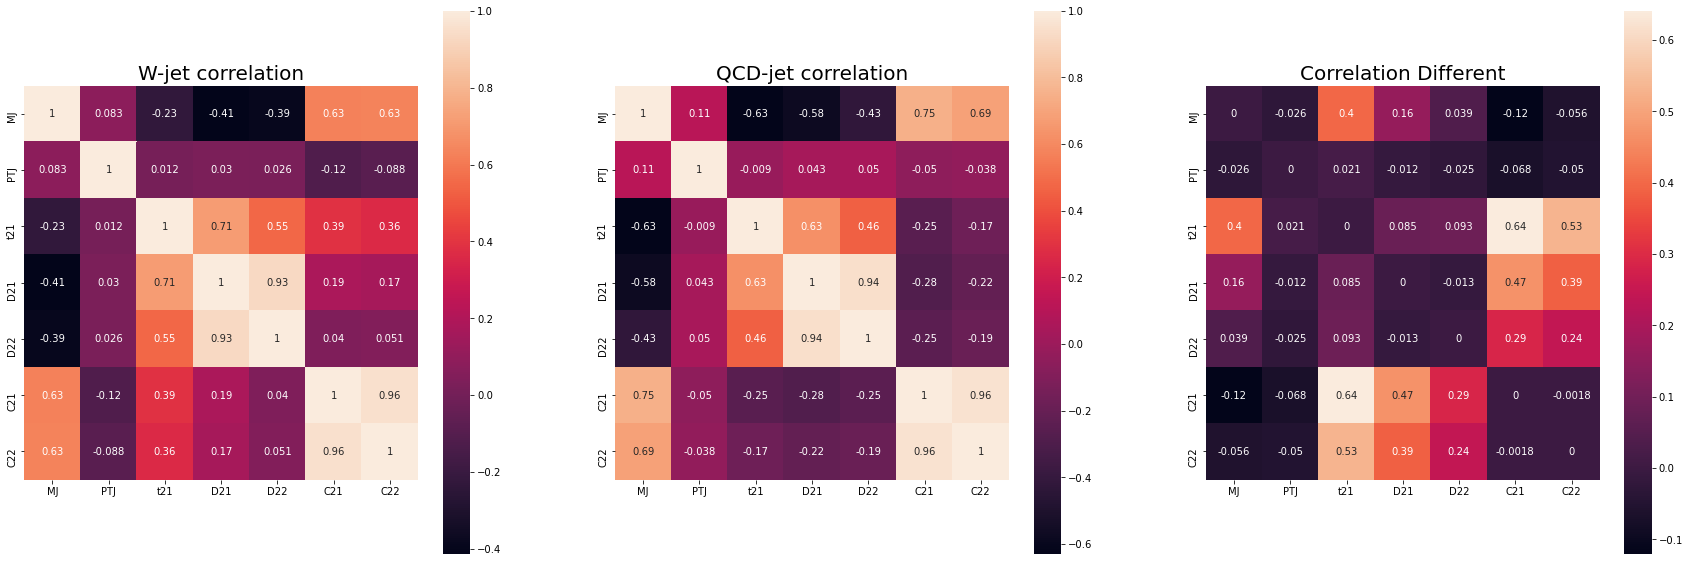

In [37]:
##############################################################################
#Code for 1.7
# 1. Please make 2 correlation tables for W jets and QCD jets, respectively.
# 2. The correlation table will contains 'MJ', 'PTJ', 't21', 'D21', 'D22', 'C21' and 'C22'.
##############################################################################
# Please code in this cell
import seaborn as sns

W_jets = Data[Data['label']==0]
QCD_jets = Data[Data['label']==1]
features = ['MJ', 'PTJ', 't21', 'D21', 'D22', 'C21' , 'C22']

W_jets_corr = W_jets[features].corr()
QCD_jets_corr = QCD_jets[features].corr()

fig, ax = plt.subplots(1, 3, figsize=(30, 10))
ax[0].set_title('W-jet correlation', fontsize=20)
sns.heatmap(data=W_jets_corr, square=True, annot=True, ax=ax[0])

ax[1].set_title('QCD-jet correlation', fontsize=20)
sns.heatmap(data=QCD_jets_corr, square=True, annot=True, ax=ax[1])

ax[2].set_title('Correlation Different', fontsize=20)
sns.heatmap(data=W_jets_corr-QCD_jets_corr, square=True, annot=True, ax=ax[2])
plt.show()
##############################################################################

### 1.8 - Description

##############################################################################
### 1.8 Description
Please describe the difference between each result of each model.

What is the strategy of choosing features for model training based on correlation matrix?

**Ans:**

We should choose the features have significant different correlation between W-jets and QCD-jets. For instance, "MJ" and "C22" features have higher correlation than others but it's difficult to distanguish two jets when the whole data have same correlation. On the other hand, "MJ" and "t21" have diffent values in the table and the absolute value of QCD-jets correlation is quite larger than Q-jets one.

Nevertheless, the result comes from the features choosing by this strategies is not as good as we expected.
In contract, the features have high correlation in both jets give us a good prediction probability curve that the peak of each curve are seperated from each other.
This result may due to the high correlation in both jets can present as the data belong to each jets are centered at distant region.
##############################################################################

### 1.9 - Code
* Please project the 5 features into 1 dimensional LDA prediction histogram. 
* You should use the prediction from (1.5).
* In this figure, x-axis is LDA prediction in W jets axis. 
* And please let total area of each curve be one, e.q. KDE

[Hint: total area is one](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.kde.html)

The accuracy for this model is 0.72.
AUC value of training data: 0.7189058685151206
AUC value of test data: 0.7280454631314085


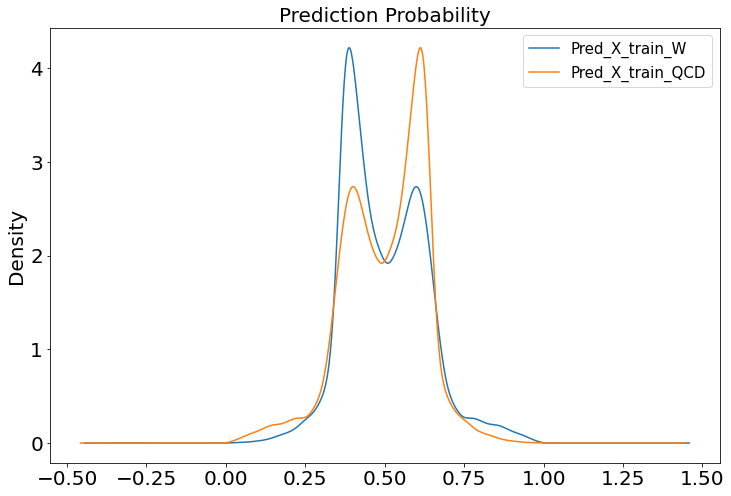

In [38]:
#Code for 1.9
# 1. Please project the 5 features into 1 dimensional LDA prediction histogram. 
# 2. You should use the prediction from 1.5.
# 3. In this figure, x-axis is LDA prediction in W jets axis. 
# 4. And please let total area of each curve be one, e.q. KDE
##############################################################################
# Please code in this cell

features = ['MJ', 'PTJ', 'C21' , 'C22']

clf = LinearDiscriminantAnalysis()
clf.fit(X_train[features],Target_train)
accuracy = clf.score(X_test[features],Target_test)

print("The accuracy for this model is {:.2f}.".format(accuracy))

Prediction_X_train = clf.predict_proba(X_train[features])
Prediction_X_test = clf.predict_proba(X_test[features])

Target_train_ = to_categorical(Target_train)
Target_test_ = to_categorical(Target_test)

axis = 0
auc_train = metrics.roc_auc_score(Target_train_[:, axis], Prediction_X_train[:, axis])
auc_test = metrics.roc_auc_score(Target_test_[:, axis], Prediction_X_test[:, axis])

print("AUC value of training data:", auc_train)
print("AUC value of test data:", auc_test)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.set_title('Prediction Probability', fontsize=20)
Pred_X_train = pd.DataFrame(data={
    'Pred_X_train_W':Prediction_X_train[:, 0],
    'Pred_X_train_QCD':Prediction_X_train[:, 1]
})

Pred_X_train.plot.kde(ax=ax)

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.ylabel("Density", fontsize=20)

plt.legend(ncol=1, fontsize=15)

plt.show()

##############################################################################

In [39]:
# training from all combination of the features


### 1.10 - Code
* Please calculate the confusion matrix for the result from 1.5
* [Hint: Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix)
* [Hint: Confusion Matrix in scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
* [Hint: Confusion Matrix in Pandas](https://datatofish.com/confusion-matrix-python/)
* [Hint: Confusion Matrix tutorial](https://github.com/cartervu/EPE_Stats_Tutorials/blob/main/Confusion_Matrix.ipynb)

The accuracy for this model is 0.71.


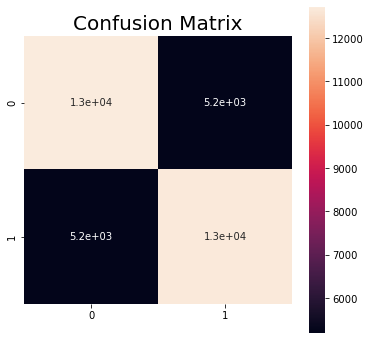

In [40]:
##############################################################################
#Code for 1.10
# 1 Please calculate the confusion matrix for the result from 1.5
##############################################################################
# Please code in this cell

features = ["MJ", "t21", "D21", "D22"]

clf = LinearDiscriminantAnalysis()
clf.fit(X_train[features], Target_train)
accuracy = clf.score(X_test[features],Target_test)

print("The accuracy for this model is {:.2f}.".format(accuracy))

Prediction_X_train = clf.predict(X_train[features])
Prediction_X_test = clf.predict(X_test[features])

cmatrix_train = metrics.confusion_matrix(Target_train, Prediction_X_train)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_title('Confusion Matrix', fontsize=20)
sns.heatmap(data=cmatrix_train, square=True, annot=True, ax=ax)
plt.show()
##############################################################################

---

# [Bonus-1] - KNN Classifier 10pt

* [Hint: k-nearest neighbors algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
* [Hint: Nearest Neighbors Classification](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)
* [Hint: KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) 







### Bonus-1.1 - Code 5pt
* Bulid a KNN model to classify W jets and QCD jets.
* You should use the teaining data set from 1.2 to train this KNN model.
* Apply this model to test data set for AUC calculation.
* Please show the AUC value.

In [41]:
# #Code for Bonus-1.1
# 1. Bulid a KNN model to classify W jets and QCD jets.
# 2. You should use the training data set from 1.2 to train this KNN model.
# 3. Apply this model to test data set for AUC calculation.
# 4. Please show the AUC value.
##############################################################################
from sklearn.neighbors import KNeighborsClassifier
# Please code in this cell

Data = pd.read_csv("/kaggle/input/phys591000-week04/W_vs_QCD.csv")
target = Data["label"]
X_train, X_test, Target_train, Target_test = train_test_split(Data, target, test_size=0.10, random_state=42)

features =['MJ_0', 'D22_0', 'MJ', 'D22']

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train[features].to_numpy(), Target_train.to_numpy())

Prediction_X_train = neigh.predict_proba(X_train[features])
Prediction_X_test = neigh.predict_proba(X_test[features])

Target_train_ = to_categorical(Target_train)
Target_test_ = to_categorical(Target_test)

axis = 0
auc_train = metrics.roc_auc_score(Target_train_[:, axis], Prediction_X_train[:, axis])
auc_test = metrics.roc_auc_score(Target_test_[:, axis], Prediction_X_test[:, axis])

print("AUC value of training data:", auc_train)
print("AUC value of test data:", auc_test)
##############################################################################

AUC value of training data: 0.9229849723517893
AUC value of test data: 0.8402760030667007


### Bonus-1.2 - Description 5pt

##############################################################################
### Bonus-1.2 Description
Please compare your KNN result to the best result from LDA.
You should describe the pros and cons for KNN and LDA, then comment on your observation. 


**Ans:**

the disadvantage of LDA:

1. it assumes that data is normally distributed.
1. from 1.3 to 1.6, when we gradually add the features, we find that the AUC value didn't have huge changes.

the advantage of KNN:

1. it doesn't have assumption about shape of boundary. 

the disadvantage of KNN:

1. It's hard to find K-value, while K-Value is important to our analysis.
2. It would be badly affect by outlier because algorithm is based on distance.

##############################################################################


# [Bonus-2] - Join Competition 

## This is a challenge. The team in the top of the leaderboard will get 10 pt. 
## Each of the rest team who joins this challenge will get 5pt

Please try your best to train a model. You will use previous labeled data "/kaggle/input/phys591000-week04/W_vs_QCD.csv" and choose whatever features you want for model training.
You can only use LDA or KNN to train your model.

The data set "/kaggle/input/phys591000-week04/X_Test.csv" also contains W jets and QCD jets with the same features in the excerise, but we remove label.

Please use your trained model and make the prediction for "/kaggle/input/phys591000-week04/X_Test.csv" to test preformance of your model. 
Then upload your prediction. The system will calculate AUC for you, automatically.

Note:
You should prepare a new table file, e.g. "StudentAID_StudentBID_submission.csv"

The data format should be two columns, the first is "index" and the second is "target".

The "index" will start from 0 to len("X_Test.csv")-1 .

The "target" is your prediction in W jets axis.

e.g.

index |target
------|:-----:|
  0   | 0.1237
  1   | 0.2342
  2   | 0.9247
  .   |   .
  .   |   . 
  .   |   .
  .   |   .
  .   |   .
  .   |   .


In [42]:
test_data = pd.read_csv("/kaggle/input/phys591000-week04/X_Test.csv")
Prediction_X_test = neigh.predict_proba(test_data[features])

df = pd.DataFrame(data={
    'index': np.arange(len(test_data)),
    'target': Prediction_X_test[:, 0]
})
df.to_csv('106022231_109022554_submission.csv', index=False)
df

,index,target
0,0,0.8
1,1,1.0
2,2,1.0
3,3,1.0
4,4,0.2
...,...,...
9995,9995,0.2
9996,9996,0.0
9997,9997,1.0
9998,9998,1.0
